In [57]:
import pandas as pd
from typing import Any, Dict, Union, List   
import numpy as np
import matplotlib.pyplot as plt
import json

from urllib.request import urlopen

In [58]:
def dataframe_builder(api_method: str, session_key: int, identifier: str, identifier_value: Any) -> pd.DataFrame:
    url_string: str = 'https://api.openf1.org/v1/' + api_method + '?' + 'session_key=' + str(session_key) + '&' + identifier + '=' + str(identifier_value)
    response: object = urlopen(url_string)
    data: json = json.loads(response.read().decode('utf-8'))
    df = pd.DataFrame(data)
    return df

In [59]:
# Verstappen Azerbaijan sprint data, 29th April 2023

response: object = urlopen('https://api.openf1.org/v1/intervals?session_key=9069&driver_number=1')
data: json = json.loads(response.read().decode('utf-8'))
df: pd.DataFrame = pd.DataFrame(data)

verLapResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9069&driver_number=1')
verLapData: json = json.loads(verLapResponse.read().decode('utf-8'))
dfLap: pd.DataFrame = pd.DataFrame(verLapData)

verLapGPResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9070&driver_number=1')
verLapGPData: json = json.loads(verLapGPResponse.read().decode('utf-8'))
dfGPLap: pd.DataFrame = pd.DataFrame(verLapGPData)

perLapResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9069&driver_number=11')
perLapData: json = json.loads(perLapResponse.read().decode('utf-8'))
dfPerLap: pd.DataFrame = pd.DataFrame(perLapData)

perLapGPResponse: object = urlopen('https://api.openf1.org/v1/laps?session_key=9070&driver_number=11')
perLapGPData: json = json.loads(perLapGPResponse.read().decode('utf-8'))
dfPerGPLap: pd.DataFrame = pd.DataFrame(perLapGPData)

dfLap.head()
df.head()
dfGPLap.head()

print(dfGPLap.shape)
print(dfLap.shape)
print(df.shape)

(51, 16)
(17, 16)
(425, 6)


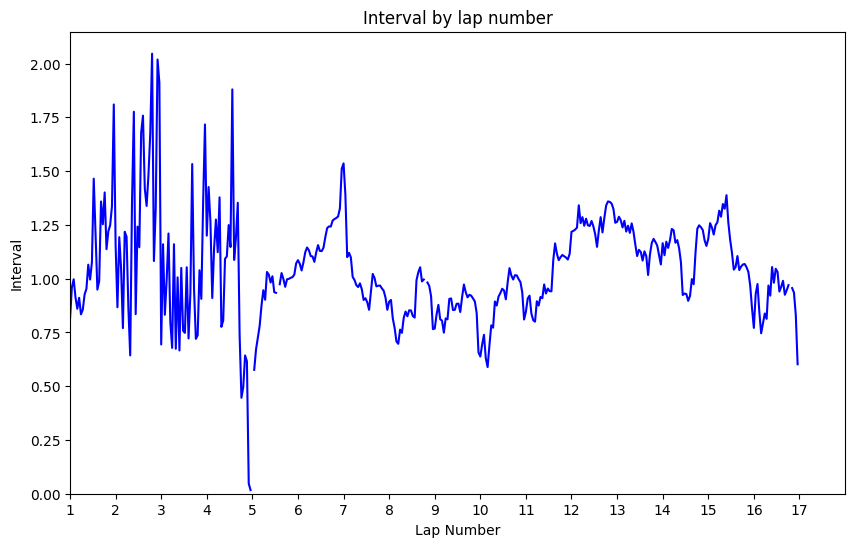

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(df.index /25, df['interval'], marker='', color='blue')

plt.title("Interval by lap number")
plt.xlabel("Lap Number")
plt.ylabel("Interval")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.show()


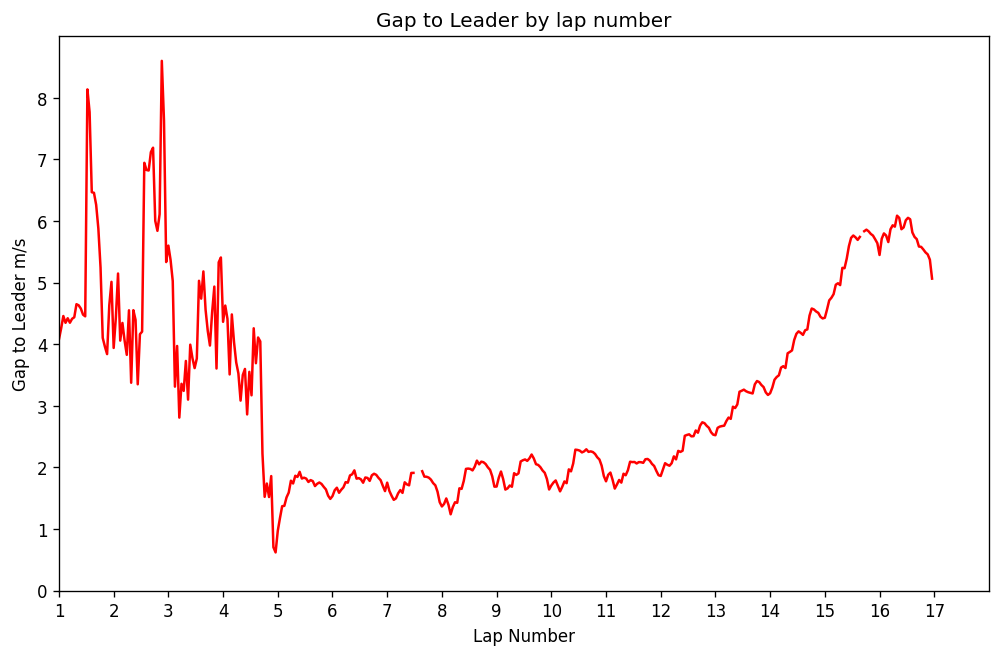

In [61]:
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(df.index / 25, df['gap_to_leader'], color='red', marker='')

plt.title("Gap to Leader by lap number")
plt.xlabel("Lap Number")
plt.ylabel("Gap to Leader m/s")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.show()

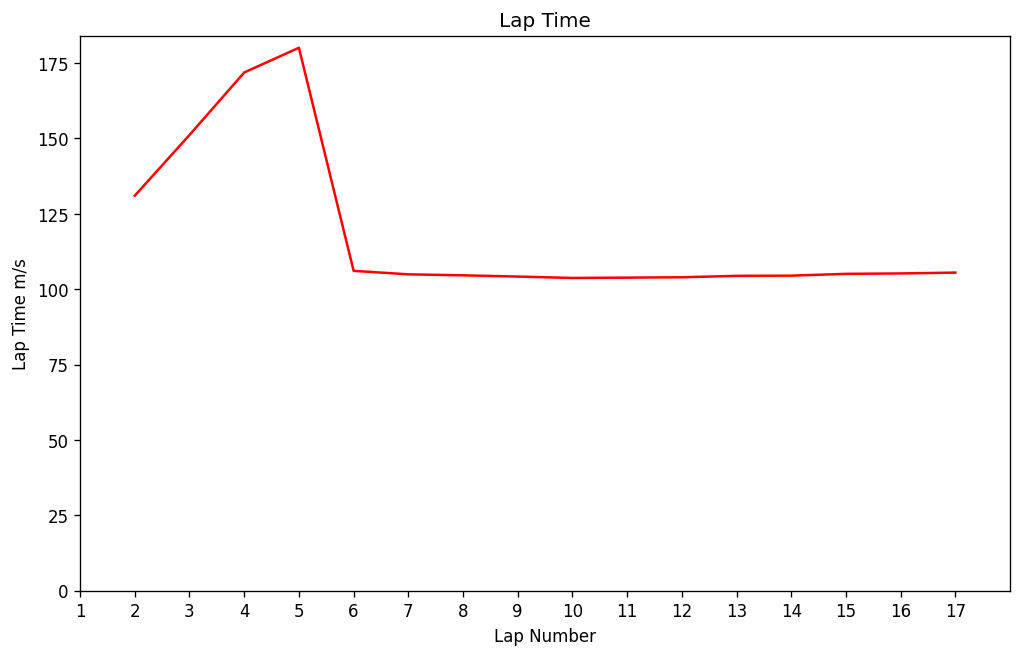

In [62]:
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dfLap['lap_number'], dfLap['lap_duration'], color='red', marker='')

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.show()

Sprint Lap Duration: 
Lap: 1, nanm :nans 
Lap: 2, 2.0m :11.008999999999986s 
Lap: 3, 2.0m :31.145999999999987s 
Lap: 4, 2.0m :51.87700000000001s 
Lap: 5, 3.0m :0.07499999999998863s 
Lap: 6, 1.0m :46.086s 
Lap: 7, 1.0m :44.928s 
Lap: 8, 1.0m :44.596999999999994s 
Lap: 9, 1.0m :44.184s 
Lap: 10, 1.0m :43.723s 
Lap: 11, 1.0m :43.834999999999994s 
Lap: 12, 1.0m :43.952s 
Lap: 13, 1.0m :44.42100000000001s 
Lap: 14, 1.0m :44.489999999999995s 
Lap: 15, 1.0m :45.086s 
Lap: 16, 1.0m :45.224000000000004s 
Lap: 17, 1.0m :45.5s 
GP Lap Duration: 
Lap: 1, nanm :nans 
Lap: 2, 1.0m :47.706999999999994s 
Lap: 3, 1.0m :47.67700000000001s 
Lap: 4, 1.0m :47.108000000000004s 
Lap: 5, 1.0m :47.476s 
Lap: 6, 1.0m :47.202s 
Lap: 7, 1.0m :46.995000000000005s 
Lap: 8, 1.0m :46.801s 
Lap: 9, 1.0m :46.944s 
Lap: 10, 1.0m :50.778000000000006s 
Lap: 11, 2.0m :43.358000000000004s 
Lap: 12, 2.0m :34.252999999999986s 
Lap: 13, 2.0m :44.22300000000001s 
Lap: 14, 1.0m :46.93600000000001s 
Lap: 15, 1.0m :45.687s 
Lap: 1

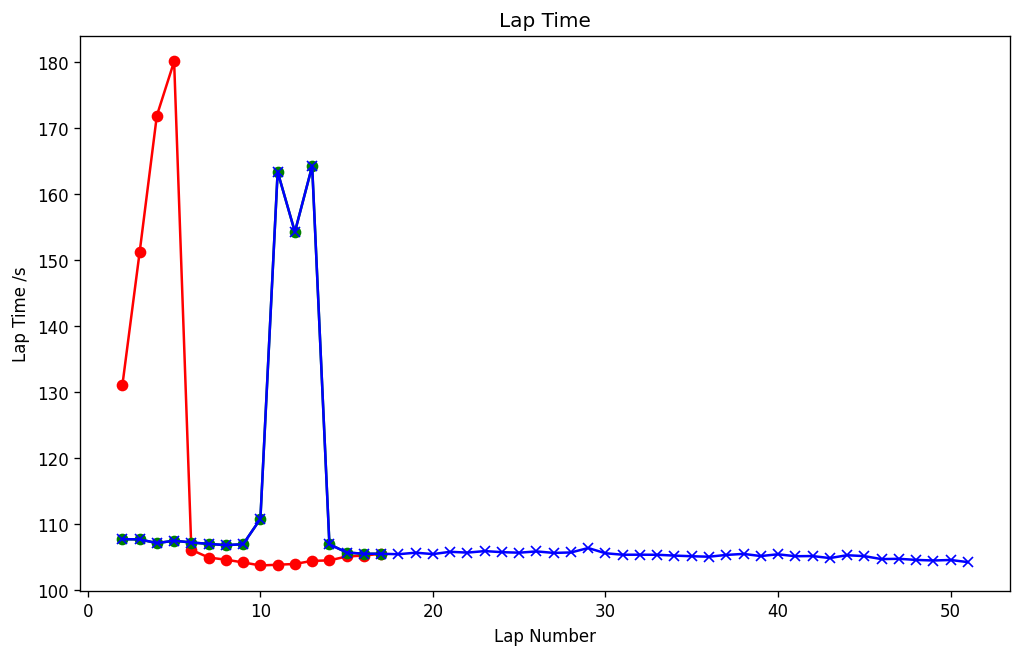

In [63]:
def convert_lap_time(df: pd.DataFrame, column: str) -> str:
    lap: int = 0
    for i in df[column]:
        lap += 1
        minutes = i // 60
        remaining_seconds = i % 60
        print(f"Lap: {lap}, {minutes}m :{remaining_seconds}s ")

print("Sprint Lap Duration: ")
convert_lap_time(dfLap, 'lap_duration')

print("GP Lap Duration: ")
convert_lap_time(dfGPLap, 'lap_duration')

dfGPLapReduced: pd.DataFrame = dfGPLap.iloc[:17, :]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dfLap['lap_number'], dfLap['lap_duration'], color='red', marker='o')
plt.plot(dfGPLapReduced['lap_number'], dfGPLapReduced['lap_duration'], color='green', marker='o')
plt.plot(dfGPLap['lap_number'], dfGPLap['lap_duration'], color='blue', marker='x')

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time /s")

plt.show()

Sprint Lap Duration: 
Lap: 1, nanm :nans 
Lap: 2, 2.0m :11.008999999999986s 
Lap: 3, 2.0m :31.145999999999987s 
Lap: 4, 2.0m :51.87700000000001s 
Lap: 5, 3.0m :0.07499999999998863s 
Lap: 6, 1.0m :46.086s 
Lap: 7, 1.0m :44.928s 
Lap: 8, 1.0m :44.596999999999994s 
Lap: 9, 1.0m :44.184s 
Lap: 10, 1.0m :43.723s 
Lap: 11, 1.0m :43.834999999999994s 
Lap: 12, 1.0m :43.952s 
Lap: 13, 1.0m :44.42100000000001s 
Lap: 14, 1.0m :44.489999999999995s 
Lap: 15, 1.0m :45.086s 
Lap: 16, 1.0m :45.224000000000004s 
Lap: 17, 1.0m :45.5s 
GP Lap Duration: 
Lap: 1, nanm :nans 
Lap: 2, 1.0m :47.706999999999994s 
Lap: 3, 1.0m :47.67700000000001s 
Lap: 4, 1.0m :47.108000000000004s 
Lap: 5, 1.0m :47.476s 
Lap: 6, 1.0m :47.202s 
Lap: 7, 1.0m :46.995000000000005s 
Lap: 8, 1.0m :46.801s 
Lap: 9, 1.0m :46.944s 
Lap: 10, 1.0m :50.778000000000006s 
Lap: 11, 2.0m :43.358000000000004s 
Lap: 12, 2.0m :34.252999999999986s 
Lap: 13, 2.0m :44.22300000000001s 
Lap: 14, 1.0m :46.93600000000001s 
Lap: 15, 1.0m :45.687s 
Lap: 1

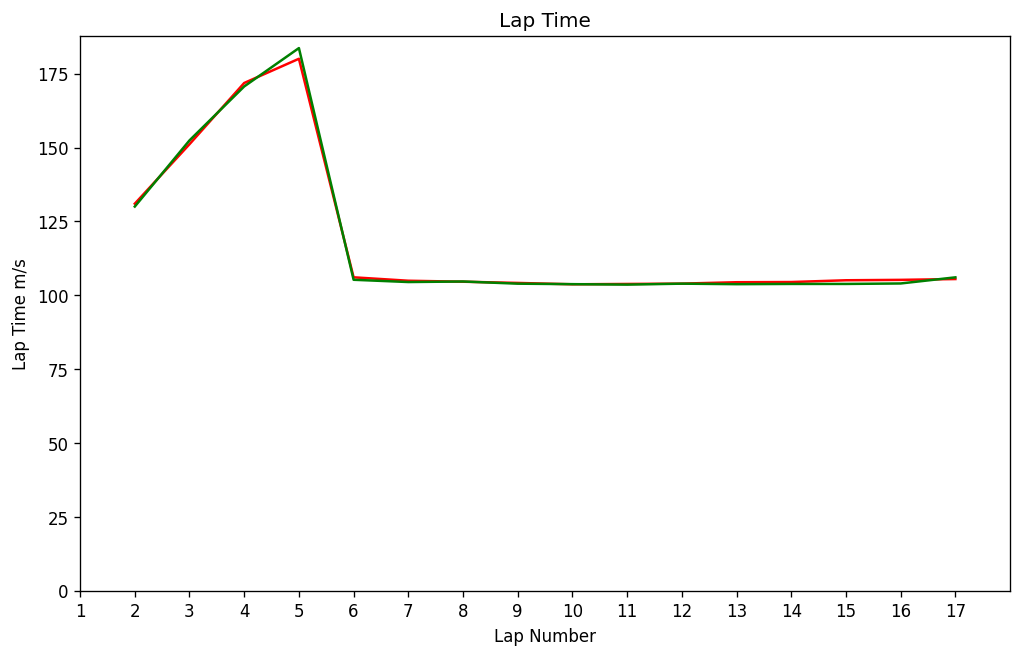

In [64]:
print("Sprint Lap Duration: ")
convert_lap_time(dfLap, 'lap_duration')

print("GP Lap Duration: ")
convert_lap_time(dfGPLap, 'lap_duration')

dfPerGPLapReduced: pd.DataFrame = dfGPLap.iloc[:17, :]

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(dfLap['lap_number'], dfLap['lap_duration'], color='red', marker='')
plt.plot(dfPerLap['lap_number'], dfPerLap['lap_duration'], color='green', marker='')

print(f"Azerbaijan Sprint, Verstappen Avg Lap Time: {dfLap['lap_duration'].mean()}, Azerbaijan Sprint, Perez Avg Lap Time:{dfPerLap['lap_duration'].mean()} ")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.show()

Index(['meeting_key', 'session_key', 'driver_number', 'i1_speed', 'i2_speed',
       'st_speed', 'date_start', 'lap_duration', 'is_pit_out_lap',
       'duration_sector_1', 'duration_sector_2', 'duration_sector_3',
       'segments_sector_1', 'segments_sector_2', 'segments_sector_3',
       'lap_number'],
      dtype='object')
Azerbaijan Grand Prix, Verstappen Avg Lap Time: 109.08234, Azerbaijan Grand Prix, Perez Avg Lap Time:109.02126 


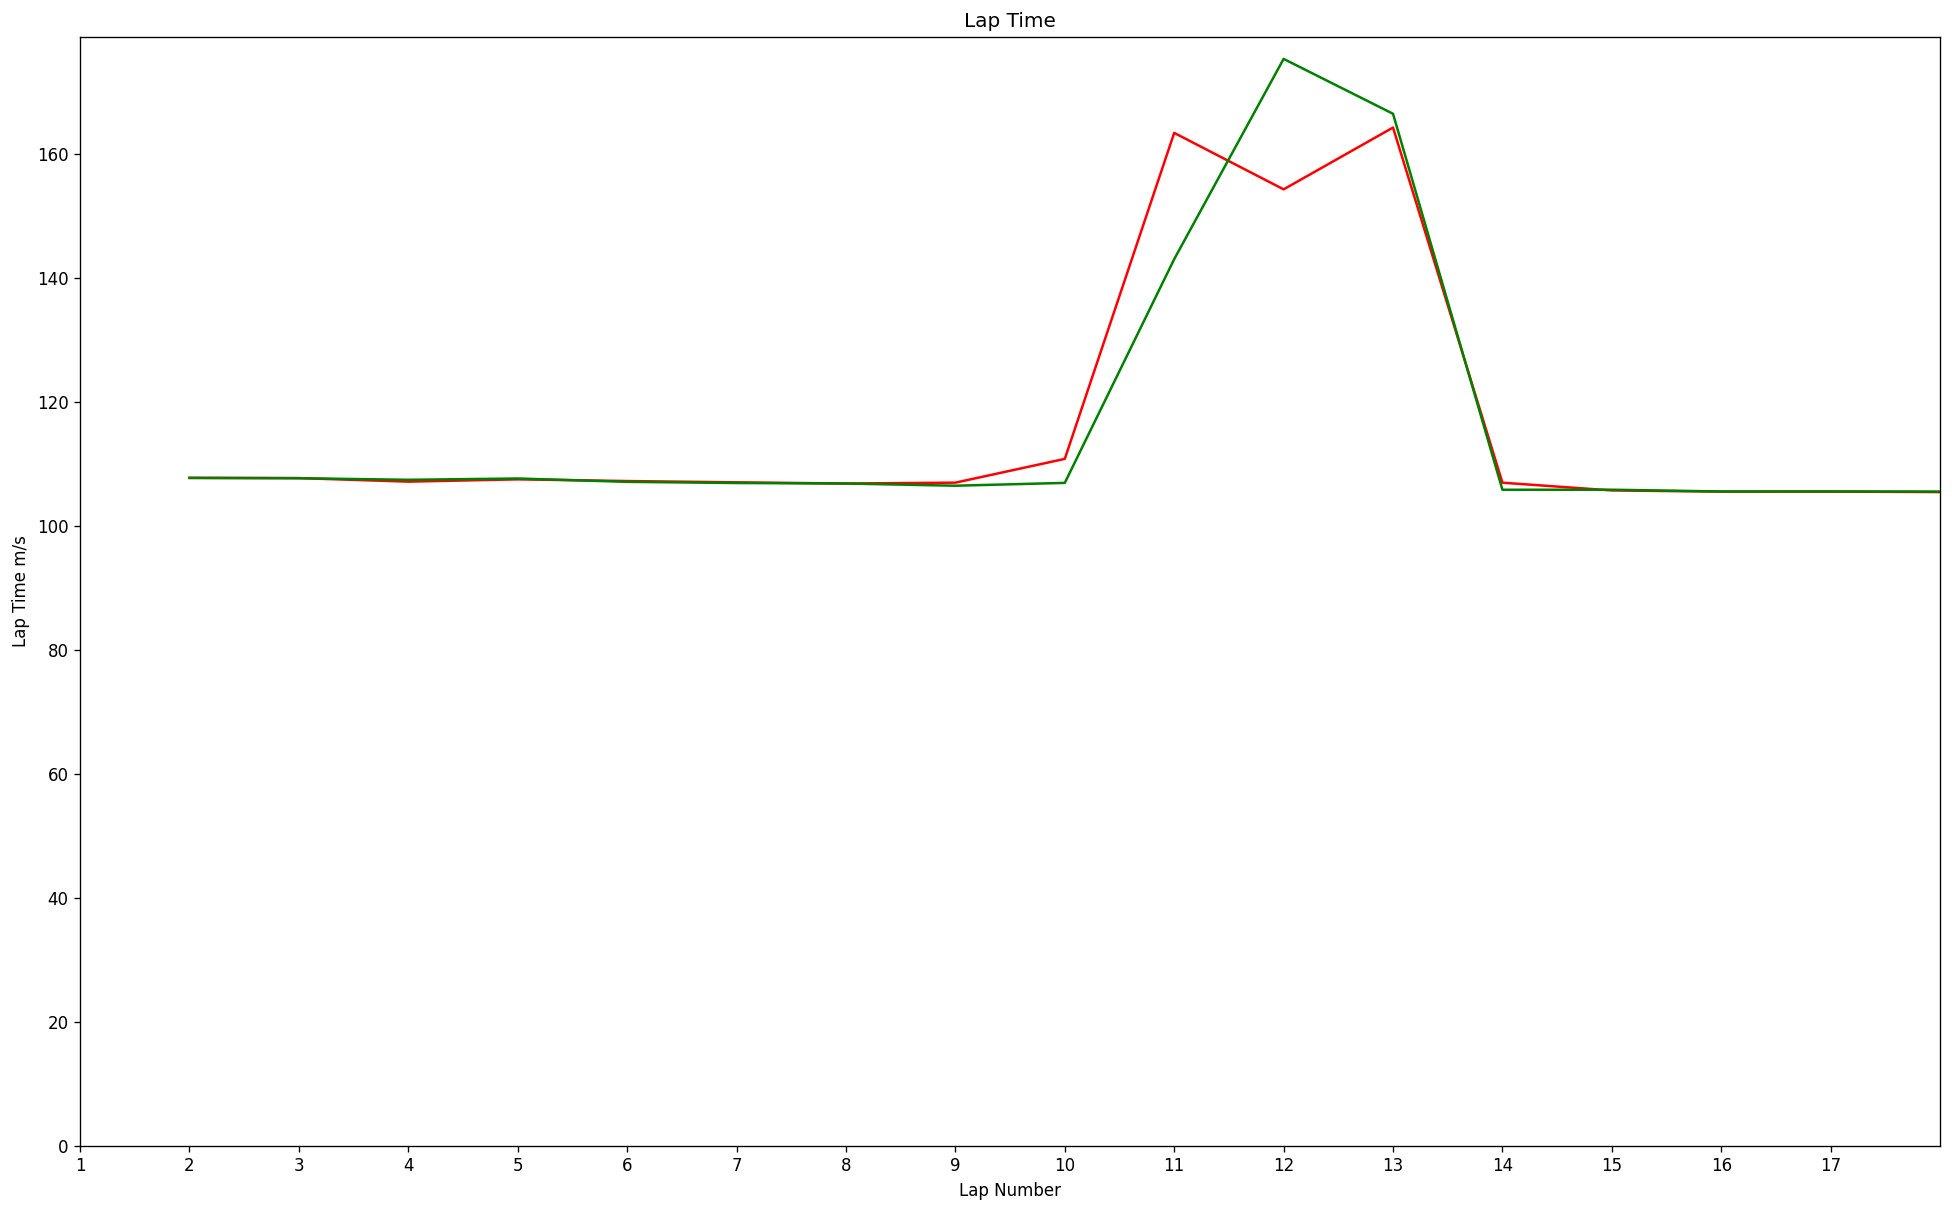

In [65]:
verLapGPData: pd.DataFrame = dataframe_builder('laps', 9070, 'driver_number', 1)
perLapGPData: pd.DataFrame = dataframe_builder('laps', 9070, 'driver_number', 11)

print(verLapGPData.columns)
verLapGPData.head()

plt.figure(figsize=(20, 12), dpi=120)
plt.plot(verLapGPData['lap_number'], verLapGPData['lap_duration'], color='red', marker='')
plt.plot(perLapGPData['lap_number'], perLapGPData['lap_duration'], color='green', marker='')

print(f"Azerbaijan Grand Prix, Verstappen Avg Lap Time: {verLapGPData['lap_duration'].mean()}, Azerbaijan Grand Prix, Perez Avg Lap Time:{perLapGPData['lap_duration'].mean()} ")

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.show()

Lap: 1: Perez nan, Verstappen nan
Lap: 2: Perez 122.516, Verstappen 134.962
Lap: 3: Perez 131.672, Verstappen 125.110
Lap: 4: Perez 176.209, Verstappen 184.678
Lap: 5: Perez 192.212, Verstappen 193.857
Lap: 6: Perez 123.393, Verstappen 118.943
Lap: 7: Perez 133.282, Verstappen 120.363
Lap: 8: Perez 133.293, Verstappen 121.417


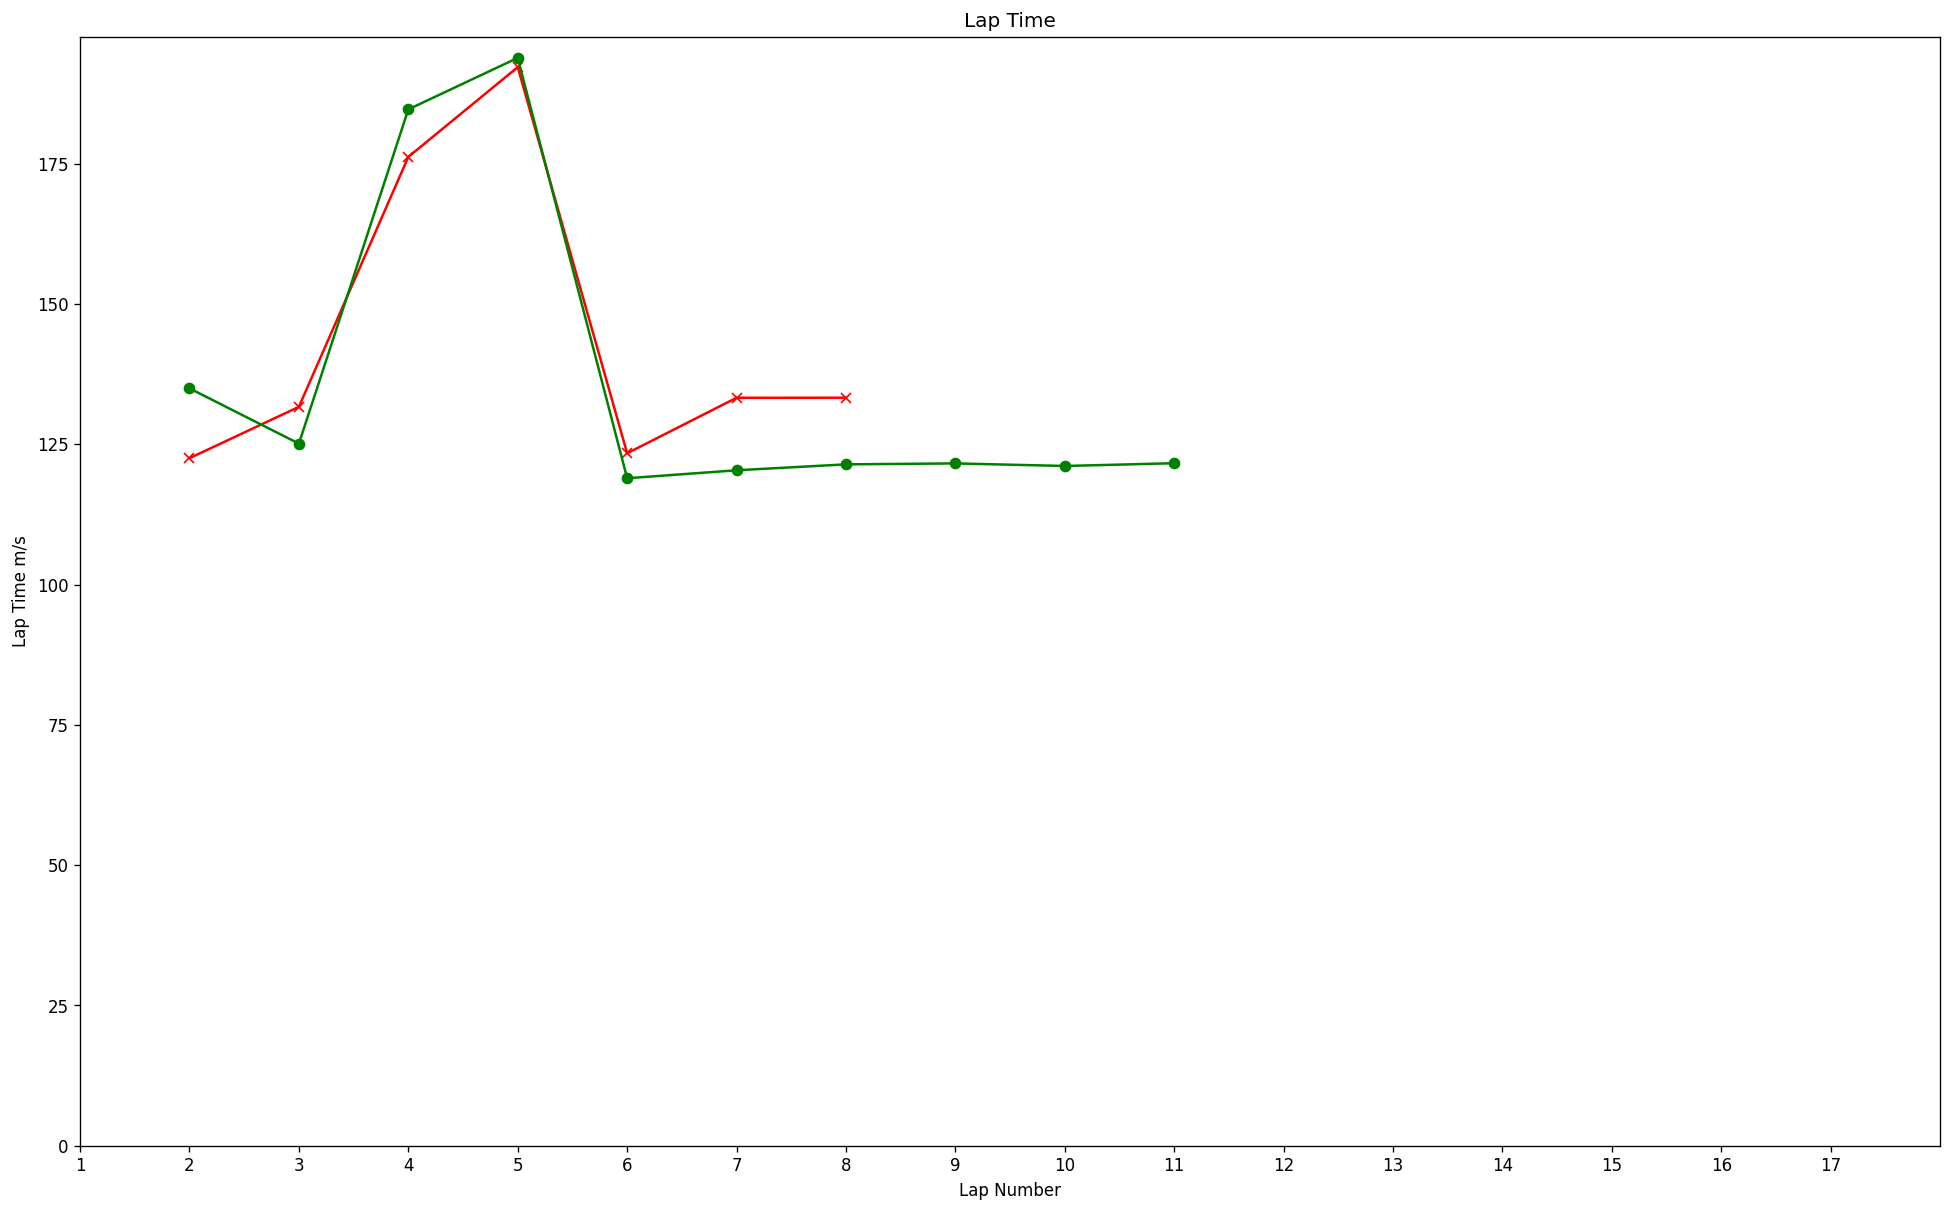

In [66]:
#https://api.openf1.org/v1/intervals?date=2023-07-29&driver_number=11
#Spa-Francochamps Sprint data.
perBelgianSprintLapData: pd.DataFrame = dataframe_builder('laps', 9140, 'driver_number', 11)
verBelgianSprintLapData: pd.DataFrame = dataframe_builder('laps', 9140, 'driver_number', 1)

num_laps: int = min(len(perBelgianSprintLapData), len(verBelgianSprintLapData))

for i in range(num_laps):
    perez_laptime = perBelgianSprintLapData['lap_duration'].iloc[i]
    verstappen_laptime = verBelgianSprintLapData['lap_duration'].iloc[i]
    print(f"Lap: {i+1}: Perez {perez_laptime:.3f}, Verstappen {verstappen_laptime:.3f}")

plt.figure(figsize=(20, 12), dpi=120)
plt.plot(perBelgianSprintLapData['lap_number'], perBelgianSprintLapData['lap_duration'], color='red', marker='x')
plt.plot(verBelgianSprintLapData['lap_number'], verBelgianSprintLapData['lap_duration'], color='green', marker='o')

plt.xticks(np.arange(0, 18, 1))
plt.xlim(1, 18)
plt.ylim(bottom=0)

plt.title("Lap Time")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time m/s")

plt.show()

In [69]:
perBelgianSprintTelemetry: pd.DataFrame = dataframe_builder('car_data', 9140, 'driver_number', 11)
verBelgianSprintTelemetry: pd.DataFrame = dataframe_builder('car_data', 9140, 'driver_number', 1)

perBelgianSprintLapData: pd.DataFrame = dataframe_builder('laps', 9140, 'driver_number', 11)
verBelgianSprintLapData: pd.DataFrame = dataframe_builder('laps', 9140, 'driver_number', 1)

verFullSprintData: pd.DataFrame = pd.merge(verBelgianSprintTelemetry, verBelgianSprintLapData, on='driver_number')
perFullSprintData: pd.DataFrame = pd.merge(perBelgianSprintTelemetry, perBelgianSprintLapData, on='driver_number')


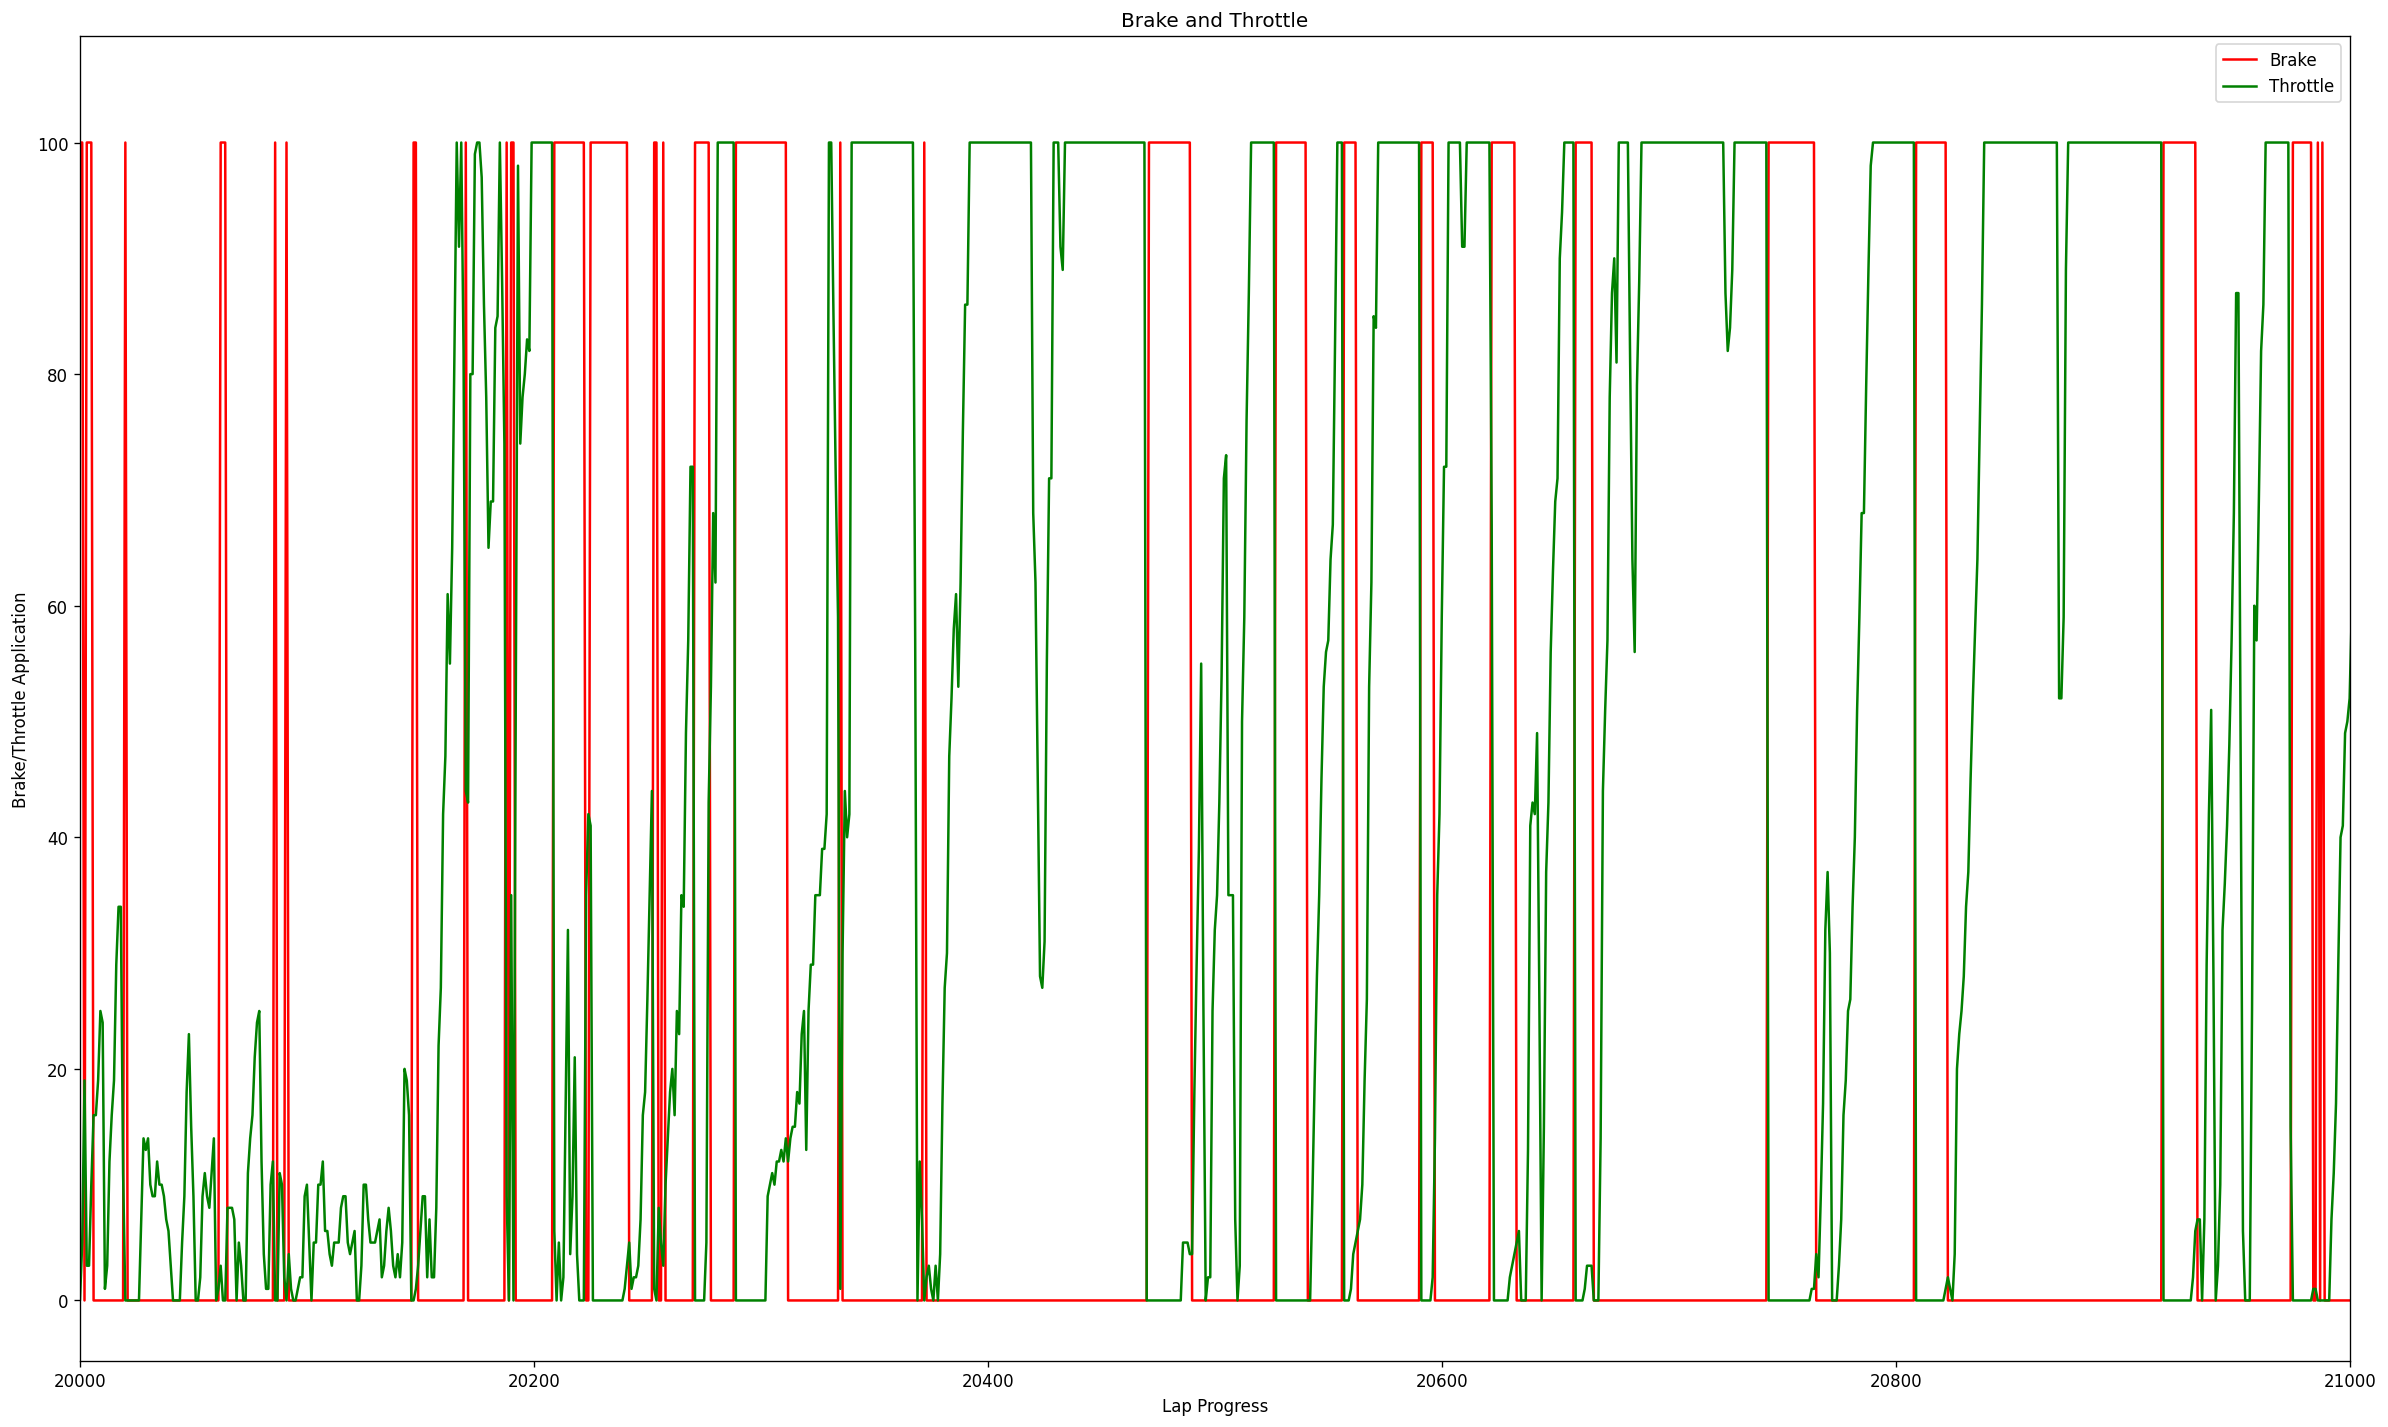

In [84]:
plt.figure(figsize=(20, 12), dpi=120)

plt.plot(perBelgianSprintTelemetry['brake'], color='red', label='Brake')
plt.plot(perBelgianSprintTelemetry['throttle'], color='green', label='Throttle')

plt.xlim(20000, 21000)
plt.title("Perez Brake and Throttle Application")
plt.xlabel("Lap Progress")
plt.ylabel("Brake/Throttle Application")

plt.legend()


plt.tight_layout()
plt.show()